In [1]:
%load_ext rpy2.ipython

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import csv
import codecs
 
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV

# Pandasでの表示が省略されないように設定
pd.set_option("max_columns", 100)
pd.set_option('max_rows',1000)
pd.set_option('max_info_columns',100)

In [3]:
with codecs.open("Consumer_Reports_2018.csv", "r", "Shift-JIS", "ignore") as file:
    df = pd.read_table(file, delimiter=",")

：Price, Disp, Hp, weight, length, hybrid, AWD, SUV, pickup,

In [4]:
df_d = df

In [5]:
print(df_d.groupby(["Model"],as_index=False).count())

                                             Model  Price_as_tested  4spd  \
0                                Acura ILX Premium                1     1   
1                                   Acura MDX Tech                1     1   
2                                        Acura RDX                1     1   
3                                   Acura RLX Tech                1     1   
4                                   Acura TLX 2.4L                1     1   
5                                 Acura TLX SH-AWD                1     1   
6                                    Alfa Romeo 4C                1     1   
7                                Alfa Romeo Giulia                1     1   
8                               Alfa Romeo Stelvio                1     1   
9                                  Audi A3 Premium                1     1   
10                            Audi A4 Premium Plus                1     1   
11                                         Audi A5                1     1   

In [6]:
#　日本産が0、それ以外は1
def Domestic(x):
    if 'Honda' in x:
        r = 0
    elif "Mazda" in x:
        r = 0
    elif "Mitsubishi" in x:
        r = 0
    elif "Nissan" in x:
        r = 0
    elif "Subaru" in x:
        r = 0  
    elif "Toyota" in x:
        r = 0  
    else:
        r = 1
    return r

In [7]:
#　高級車が１、それ以外は０
#4.4316万ドル以上を高級車とする（日本円で５００万以上）
def exp_brand(x):
    if 'Cadillac' in x:
        r = 1
    elif "Genesis" in x:
        r = 1
    elif "Alfa" in x:
        r = 1
    elif "BMW" in x:
        r = 1
    elif "Infiniti" in x:
        r = 1
    elif "Jaguar" in x:
        r = 1
    elif "Genesis" in x:
        r = 1
    elif "Land" in x:
        r = 1
    elif "Lincoin" in x:
        r = 1
    elif "Maserati" in x:
        r = 1
    elif "Mercedes-Benz" in x:
        r = 1
    elif "Porsche" in x:
        r = 1
    elif "Volvo" in x:
        r = 1
    elif "Audi" in x:
        r = 1
    elif "Lexus" in x:
        r = 1
    elif "Lincoln" in x:
        r = 1
    else:
        r = 0
    return r

In [8]:
df_d["Model"] = df_d["Model"].astype('str')
df_d['model_ja'] = df_d['Model'].apply(Domestic)
df_d["exp_brand"] = df_d["Model"].apply(exp_brand)

In [9]:
df_new = df_d

In [10]:
y_ori = df_new["Price_as_tested"]
y = np.log(df_new["Price_as_tested"])
awd = df_new["AWD"]
suv = df_new["SUV"]
pick = df_new["Pickup"]
luxuary = df_new["Luxuary"]
domestic = df_new["model_ja"]

In [11]:
# 特徴量の数が多いので､locメソッドで一部の特徴量のみを選択
ev_1 = df_new.loc[:, ['Hp','exp_brand',"AWD"]]
X1 = ev_1.values
ev_2 = df_new.loc[:, ["Hp","Luxuary","Hybrid(option)","SUV"]]
X2 = ev_2.values
ev_3 = df_new.loc[:, ["Hp","Luxuary","AWD"]]
X3 = ev_3.values

In [12]:
df_new.isnull().sum()

Model              0
Price_as_tested    0
4spd               0
6over              0
cvt                0
Disp               0
Hp                 0
AWD                0
4WD_dummy          0
rear               0
SUV                0
Pickup             0
Minivan            0
Sports             0
Luxuary            0
Curb Weight(lb)    0
length(inch)       0
MPG_ovarall        0
Reliability        0
Electric           0
Hybrid             0
Hybrid(option)     0
model_ja           0
exp_brand          0
dtype: int64

In [13]:
df_new

,Model,Price_as_tested,4spd,6over,cvt,Disp,Hp,AWD,4WD_dummy,rear,SUV,Pickup,Minivan,Sports,Luxuary,Curb Weight(lb),length(inch),MPG_ovarall,Reliability,Electric,Hybrid,Hybrid(option),model_ja,exp_brand
0,Acura ILX Premium,31600.0,0,1,0,2.4,201,0,0,0,0,0,0,0,1,3100,182,28,1,0,0,0,1,0
1,Acura MDX Tech,51425.0,0,1,0,3.5,290,1,0,0,1,0,0,0,1,4200,196,21,2,0,0,1,1,0
2,Acura RDX,40100.0,0,1,0,3.5,279,1,0,0,1,0,0,0,1,3850,184,22,4,0,0,0,1,0
3,Acura RLX Tech,58400.0,0,1,0,3.5,310,1,0,0,0,0,0,0,1,3930,198,23,2,0,0,1,1,0
4,Acura TLX 2.4L,39375.0,0,1,0,2.4,206,0,0,0,0,0,0,0,1,3480,190,27,2,0,0,0,1,0
5,Acura TLX SH-AWD,39375.0,0,1,0,3.5,290,1,0,0,0,0,0,0,1,3750,190,25,2,0,0,0,1,0
6,Alfa Romeo 4C,60900.0,0,1,0,1.7,237,0,0,1,0,0,0,1,0,2470,157,28,1,0,0,0,1,1
7,Alfa Romeo Giulia,55947.5,0,1,0,2.0,280,1,0,1,0,0,0,0,0,3700,183,27,1,0,0,0,1,1
8,Alfa Romeo Stelvio,42995.0,0,1,0,2.0,280,1,0,0,1,0,0,0,0,4020,185,24,1,0,0,0,1,1
9,Audi A3 Premium,37800.0,0,1,0,1.4,204,1,0,0,0,0,0,0,1,3140,175,27,3,0,0,0,1,1


Hpとlengthは２つだとマイナスになるがluxuaryを入れると復活する

In [334]:
X1

array([[201,   0,   0],
       [290,   0,   1],
       [279,   0,   1],
       [310,   0,   1],
       [206,   0,   0],
       [290,   0,   1],
       [237,   1,   0],
       [280,   1,   1],
       [280,   1,   1],
       [204,   1,   1],
       [190,   1,   1],
       [252,   1,   1],
       [340,   1,   1],
       [200,   1,   1],
       [252,   1,   1],
       [333,   1,   1],
       [220,   1,   1],
       [320,   1,   1],
       [320,   1,   1],
       [180,   1,   1],
       [248,   1,   1],
       [320,   1,   1],
       [335,   1,   1],
       [228,   1,   1],
       [248,   1,   1],
       [240,   1,   1],
       [300,   1,   1],
       [200,   0,   0],
       [310,   0,   1],
       [153,   0,   1],
       [252,   0,   1],
       [200,   0,   1],
       [310,   0,   1],
       [250,   0,   1],
       [272,   1,   1],
       [335,   1,   1],
       [335,   1,   1],
       [310,   1,   1],
       [304,   1,   1],
       [455,   0,   0],
       [305,   0,   0],
       [200,   0

In [137]:
# 線形回帰モデルのクラスを読み込み
from sklearn.linear_model import LinearRegression

# 線形回帰のインスタンスを生成
lr = LinearRegression()
lr.fit(X1,y)
print(lr.score(X1,y))
print(lr.coef_)
print(lr.intercept_)

0.7826681596735148
[0.00300134 0.30129531 0.07563276]
9.63063519574089


In [138]:
# 線形回帰モデルのクラスを読み込み
from sklearn.linear_model import LinearRegression

# 線形回帰のインスタンスを生成
lr2 = LinearRegression()
lr2.fit(X2,y)
print(lr2.score(X2,y))
print(lr2.coef_)
print(lr2.intercept_)

0.7347506947043495
[0.00311722 0.23029759 0.14552987 0.06393626]
9.628362398376305


In [139]:
# 線形回帰モデルのクラスを読み込み
from sklearn.linear_model import LinearRegression

# 線形回帰のインスタンスを生成
lr3 = LinearRegression()
lr3.fit(X3,y)
print(lr3.score(X3,y))
print(lr3.coef_)
print(lr3.intercept_)

0.7360477425412275
[0.00311781 0.21821496 0.10755548]
9.60595442169569


# QQプロット１回目

In [140]:
y_res1 = y - lr.predict(X1) 
y_res2 = y - lr2.predict(X2)
y_res3 = y - lr3.predict(X3) 

,Model,Price_as_tested,4spd,6over,cvt,Disp,Hp,AWD,4WD_dummy,rear,SUV,Pickup,Minivan,Sports,Luxuary,Curb Weight(lb),length(inch),MPG_ovarall,Reliability,Electric,Hybrid,Hybrid(option),model_ja,exp_brand
0,Acura ILX Premium,31600.0,0,1,0,2.4,201,0,0,0,0,0,0,0,1,3100,182,28,1,0,0,0,1,0
1,Acura MDX Tech,51425.0,0,1,0,3.5,290,1,0,0,1,0,0,0,1,4200,196,21,2,0,0,1,1,0
2,Acura RDX,40100.0,0,1,0,3.5,279,1,0,0,1,0,0,0,1,3850,184,22,4,0,0,0,1,0
3,Acura RLX Tech,58400.0,0,1,0,3.5,310,1,0,0,0,0,0,0,1,3930,198,23,2,0,0,1,1,0
4,Acura TLX 2.4L,39375.0,0,1,0,2.4,206,0,0,0,0,0,0,0,1,3480,190,27,2,0,0,0,1,0
5,Acura TLX SH-AWD,39375.0,0,1,0,3.5,290,1,0,0,0,0,0,0,1,3750,190,25,2,0,0,0,1,0
6,Alfa Romeo 4C,60900.0,0,1,0,1.7,237,0,0,1,0,0,0,1,0,2470,157,28,1,0,0,0,1,1
7,Alfa Romeo Giulia,55947.5,0,1,0,2.0,280,1,0,1,0,0,0,0,0,3700,183,27,1,0,0,0,1,1
8,Alfa Romeo Stelvio,42995.0,0,1,0,2.0,280,1,0,0,1,0,0,0,0,4020,185,24,1,0,0,0,1,1
9,Audi A3 Premium,37800.0,0,1,0,1.4,204,1,0,0,0,0,0,0,1,3140,175,27,3,0,0,0,1,1


In [141]:
import sys
import matplotlib.pyplot as plt
from matplotlib import animation as ani
import numpy as np
import pandas as pd
import scipy.stats as st
from scipy.special import ndtri

In [113]:
data_size = len(df_new)

In [114]:
data_size

268

In [142]:
from numpy.random import *
import numpy as np 
import scipy.stats as stats
import pylab

In [143]:
y_res1.isunll.sum()

AttributeError: 'Series' object has no attribute 'isunll'

# QQプロットモデル１−１

((array([-2.79649277, -2.4966039 , -2.32650869, -2.20514436, -2.10955733,
         -2.03007379, -1.96166434, -1.90136582, -1.84727945, -1.79811247,
         -1.7529434 , -1.7110913 , -1.67203817, -1.63538038, -1.60079708,
         -1.56802882, -1.53686267, -1.50712165, -1.47865698, -1.45134236,
         -1.42506958, -1.39974522, -1.37528804, -1.3516269 , -1.32869918,
         -1.30644941, -1.28482825, -1.26379157, -1.24329979, -1.22331718,
         -1.20381147, -1.18475332, -1.16611605, -1.14787525, -1.1300086 ,
         -1.11249556, -1.09531724, -1.07845621, -1.06189633, -1.04562265,
         -1.02962128, -1.01387928, -0.99838461, -0.98312599, -0.96809291,
         -0.95327549, -0.93866447, -0.92425113, -0.91002729, -0.89598523,
         -0.88211765, -0.86841767, -0.85487877, -0.8414948 , -0.82825989,
         -0.81516849, -0.80221533, -0.7893954 , -0.77670391, -0.76413631,
         -0.75168825, -0.73935561, -0.7271344 , -0.71502084, -0.70301131,
         -0.69110233, -0.67929056, -0.

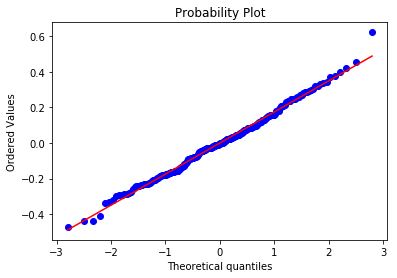

In [144]:
stats.probplot(y_res1, dist="norm", plot=pylab)

# QQプロットモデル２−１

((array([-2.79649277, -2.4966039 , -2.32650869, -2.20514436, -2.10955733,
         -2.03007379, -1.96166434, -1.90136582, -1.84727945, -1.79811247,
         -1.7529434 , -1.7110913 , -1.67203817, -1.63538038, -1.60079708,
         -1.56802882, -1.53686267, -1.50712165, -1.47865698, -1.45134236,
         -1.42506958, -1.39974522, -1.37528804, -1.3516269 , -1.32869918,
         -1.30644941, -1.28482825, -1.26379157, -1.24329979, -1.22331718,
         -1.20381147, -1.18475332, -1.16611605, -1.14787525, -1.1300086 ,
         -1.11249556, -1.09531724, -1.07845621, -1.06189633, -1.04562265,
         -1.02962128, -1.01387928, -0.99838461, -0.98312599, -0.96809291,
         -0.95327549, -0.93866447, -0.92425113, -0.91002729, -0.89598523,
         -0.88211765, -0.86841767, -0.85487877, -0.8414948 , -0.82825989,
         -0.81516849, -0.80221533, -0.7893954 , -0.77670391, -0.76413631,
         -0.75168825, -0.73935561, -0.7271344 , -0.71502084, -0.70301131,
         -0.69110233, -0.67929056, -0.

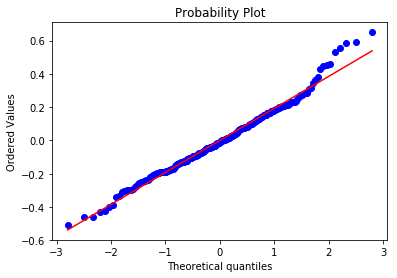

In [145]:
stats.probplot(y_res2, dist="norm", plot=pylab)

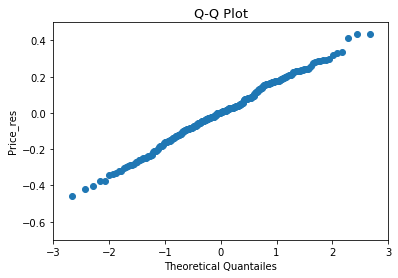

In [25]:
price_ordered = np.sort(y_res1)

# 標準正規分布の逆関数(xの定義域と粒度は0-1の間をデータサイズの数分割したもの)
inv = ndtri(np.linspace(0, 1, data_size))#float(i)/len(price)) for i in range(len(price))] 

plt.title("Q-Q Plot", size=13)
plt.xlabel("Theoretical Quantailes")
plt.ylabel("Price_res")
plt.ylim(-0.7, 0.5)
plt.xlim(-3, 3)
plt.scatter(inv, price_ordered)
plt.show()

((array([-2.79649277, -2.4966039 , -2.32650869, -2.20514436, -2.10955733,
         -2.03007379, -1.96166434, -1.90136582, -1.84727945, -1.79811247,
         -1.7529434 , -1.7110913 , -1.67203817, -1.63538038, -1.60079708,
         -1.56802882, -1.53686267, -1.50712165, -1.47865698, -1.45134236,
         -1.42506958, -1.39974522, -1.37528804, -1.3516269 , -1.32869918,
         -1.30644941, -1.28482825, -1.26379157, -1.24329979, -1.22331718,
         -1.20381147, -1.18475332, -1.16611605, -1.14787525, -1.1300086 ,
         -1.11249556, -1.09531724, -1.07845621, -1.06189633, -1.04562265,
         -1.02962128, -1.01387928, -0.99838461, -0.98312599, -0.96809291,
         -0.95327549, -0.93866447, -0.92425113, -0.91002729, -0.89598523,
         -0.88211765, -0.86841767, -0.85487877, -0.8414948 , -0.82825989,
         -0.81516849, -0.80221533, -0.7893954 , -0.77670391, -0.76413631,
         -0.75168825, -0.73935561, -0.7271344 , -0.71502084, -0.70301131,
         -0.69110233, -0.67929056, -0.

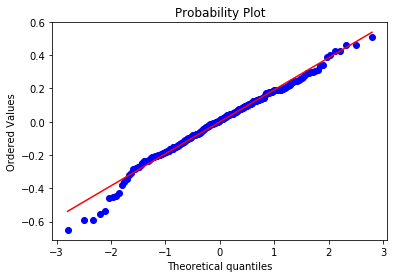

In [26]:
stats.probplot(y_res2, dist="norm", plot=pylab)

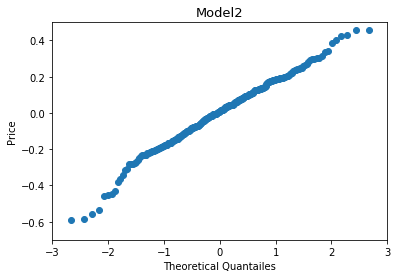

In [342]:
price_ordered = np.sort(y_res2)

inv = ndtri(np.linspace(0, 1, data_size))

plt.title("Model2", size=13)
plt.xlabel("Theoretical Quantailes")
plt.ylabel("Price")
plt.ylim(-0.7, 0.5)
plt.xlim(-3, 3)
plt.scatter(inv, price_ordered)
plt.show()

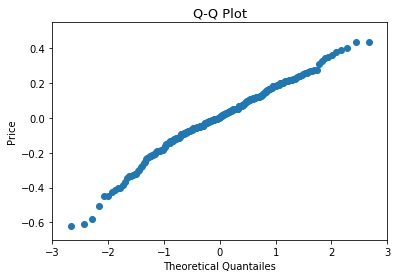

In [118]:
price_ordered = np.sort(y_res3)

inv = ndtri(np.linspace(0, 1, data_size))

plt.title("Q-Q Plot", size=13)
plt.xlabel("Theoretical Quantailes")
plt.ylabel("Price")
plt.ylim(-0.7, 0.55)
plt.xlim(-3, 3)
plt.scatter(inv, price_ordered)
plt.show()

In [27]:
drop_elements = ["4spd","6over","cvt","4WD_dummy","Pickup","Minivan","Sports","MPG_ovarall","Reliability","Electric","Hybrid","Model"]

df_new = df_new.drop(drop_elements,axis=1)


# 残差プロット１回目

In [146]:
# 線形回帰モデルのクラスを読み込み
from sklearn.linear_model import LinearRegression

# 線形回帰のインスタンスを生成
y_pred = lr.predict(X1)

In [147]:
# 残差プロットを行う関数を定義
def res_plot(y, y_pred):
    # train, testごとに残差を算出
    res = y - y_pred
    
    # train, testごとに(予測値, 残差)をプロット
    plt.figure(figsize=(8, 8))
    plt.scatter(y_pred, res, color='blue', marker='o', label='train', alpha=0.5)
    
    plt.xlabel('Predicted Values')                  # x軸のラベルを表示
    plt.ylabel('Residuals')                         # y軸のラベルを表示
    plt.legend(loc='upper left')                    # 凡例を左上に表示
    plt.hlines(y=0, xmin=-10, xmax=50, color='red') # 残差0の線を表示
    plt.xlim([9.75, 11.5])                             # 表示する横軸の範囲を指定
    plt.show()


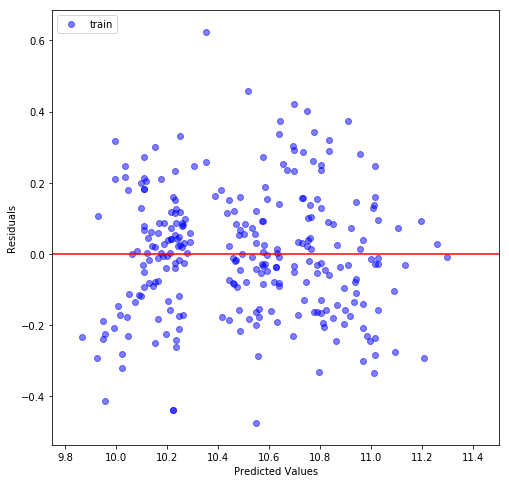

In [148]:
res_plot(y,lr.predict(X1))

# 外れ値を抜いて再度学習

In [149]:
res = pd.DataFrame(y - y_pred)

In [150]:
res_model1 = pd.concat([y_ori,df_new["Model"],res],axis=1).values

In [153]:
print(res_model1[res_model1[:,2] < -0.40])
print("")
print(res_model1[res_model1[:,2] > 0.60])

[[17745.0 'Ford Fiesta SE (hatchback, 4-cyl MT, 6-speed)'
  -0.43803927443974366]
 [17745.0 'Ford Fiesta SE (sedan, 4-cyl.)' -0.43803927443974366]
 [23745.0 'Honda Civic Sedan Si' -0.47391667585671193]
 [13975.0 'Nissan Versa SV (sedan)' -0.4127554950371852]]

[[58347.5 'Jeep Grand Cherokee Limited (diesel)' 0.6232160149003327]]


In [154]:
df_new.loc[[136],:] = None

In [155]:
df_res = df_new.dropna(how='any', axis=0)

In [156]:
df_res.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 267 entries, 0 to 267
Data columns (total 24 columns):
Model              267 non-null object
Price_as_tested    267 non-null float64
4spd               267 non-null float64
6over              267 non-null float64
cvt                267 non-null float64
Disp               267 non-null float64
Hp                 267 non-null float64
AWD                267 non-null float64
4WD_dummy          267 non-null float64
rear               267 non-null float64
SUV                267 non-null float64
Pickup             267 non-null float64
Minivan            267 non-null float64
Sports             267 non-null float64
Luxuary            267 non-null float64
Curb Weight(lb)    267 non-null float64
length(inch)       267 non-null float64
MPG_ovarall        267 non-null float64
Reliability        267 non-null float64
Electric           267 non-null float64
Hybrid             267 non-null float64
Hybrid(option)     267 non-null float64
model_ja        

In [157]:
# 特徴量の数が多いので､locメソッドで一部の特徴量のみを選択
ev_again = df_res.loc[:, ['Hp','exp_brand',"AWD"]]
X4 = ev_again.values

In [158]:
y_267 = df_res["Price_as_tested"].values

In [159]:
y_again = np.log(df_res["Price_as_tested"].values)

In [160]:
# 線形回帰モデルのクラスを読み込み
from sklearn.linear_model import LinearRegression

# 線形回帰のインスタンスを生成
lr_again = LinearRegression()
lr_again.fit(X4,y_again)
print(lr_again.score(X4,y_again))
y_pred = lr_again.predict(X4)

0.7919440411513727


# QQプロット２回目

In [161]:
res_re = y_again - y_pred

((array([-2.79528612, -2.49527961, -2.32510771, -2.20368347, -2.10804586,
         -2.02851775, -1.96006799, -1.89973233, -1.84561129, -1.79641163,
         -1.75121149, -1.70932968, -1.67024799, -1.63356263, -1.59895262,
         -1.56615839, -1.53496693, -1.50520118, -1.4767123 , -1.44937394,
         -1.42307783, -1.39773052, -1.37325073, -1.34956728, -1.32661752,
         -1.30434597, -1.28270326, -1.26164524, -1.2411323 , -1.22112871,
         -1.20160217, -1.18252334, -1.1638655 , -1.14560426, -1.12771727,
         -1.11018398, -1.0929855 , -1.07610438, -1.05952448, -1.04323083,
         -1.02720954, -1.01144766, -0.99593315, -0.98065472, -0.96560185,
         -0.95076465, -0.93613386, -0.92170076, -0.90745716, -0.89339533,
         -0.87950797, -0.86578819, -0.85222948, -0.83882567, -0.82557088,
         -0.81245959, -0.79948649, -0.78664657, -0.77393505, -0.76134738,
         -0.7488792 , -0.73652636, -0.72428491, -0.71215104, -0.70012113,
         -0.68819169, -0.6763594 , -0.

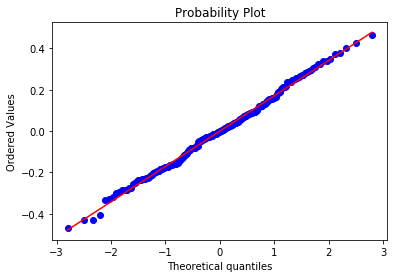

In [162]:
stats.probplot(res_re, dist="norm", plot=pylab)

In [84]:
%R -i X4
%R -i y


UsageError: Line magic function `%R` not found.


In [85]:
%R ls.print(lsfit(X4,y))

UsageError: Line magic function `%R` not found.


# 残差プロット２回目

In [165]:
# 残差プロットを行う関数を定義
def res_plot(y_again, y_pred):
    # train, testごとに残差を算出
    res = y_again - y_pred
    
    # train, testごとに(予測値, 残差)をプロット
    plt.figure(figsize=(8, 8))
    plt.scatter(y_pred, res, color='blue', marker='o', label='residuals', alpha=0.5)
    
    plt.xlabel('Predicted Values')                  # x軸のラベルを表示
    plt.ylabel('Residuals')                         # y軸のラベルを表示
    plt.legend(loc='upper left')                    # 凡例を左上に表示
    plt.hlines(y=0, xmin=-10, xmax=50, color='red') # 残差0の線を表示
    plt.xlim([9.75, 11.5])                             # 表示する横軸の範囲を指定
    plt.show()

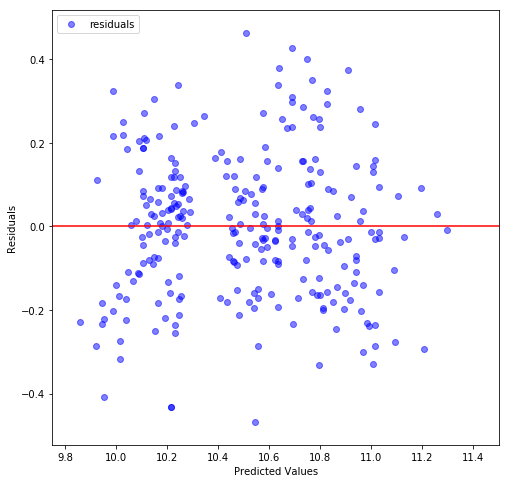

In [166]:
res_plot(y_again,y_pred)

In [167]:
y_res1 = y_pred - y_again
y = df_res["Price_as_tested"]

In [168]:
res_model = pd.concat([y,df_new["Model"],res_again],axis=1).values

NameError: name 'res_again' is not defined

In [169]:
print(res_model[res_model[:,2] < -0.40])
print("")
print(res_model[res_model[:,2] > 0.40])

NameError: name 'res_model' is not defined

In [283]:
res_again = pd.DataFrame(y_res1)

In [289]:
df_new

,Model,Price_as_tested,4spd,6over,cvt,Disp,Hp,AWD,4WD_dummy,rear,SUV,Pickup,Minivan,Sports,Luxuary,Curb Weight(lb),length(inch),MPG_ovarall,Reliability,Electric,Hybrid,Hybrid(option),model_ja,exp_brand
0,Acura ILX Premium,31600.0,0.0,1.0,0.0,2.4,201.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3100.0,182.0,28.0,1.0,0.0,0.0,0.0,1.0,0.0
1,Acura MDX Tech,51425.0,0.0,1.0,0.0,3.5,290.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,4200.0,196.0,21.0,2.0,0.0,0.0,1.0,1.0,0.0
2,Acura RDX,40100.0,0.0,1.0,0.0,3.5,279.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3850.0,184.0,22.0,4.0,0.0,0.0,0.0,1.0,0.0
3,Acura RLX Tech,58400.0,0.0,1.0,0.0,3.5,310.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3930.0,198.0,23.0,2.0,0.0,0.0,1.0,1.0,0.0
4,Acura TLX 2.4L,39375.0,0.0,1.0,0.0,2.4,206.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3480.0,190.0,27.0,2.0,0.0,0.0,0.0,1.0,0.0
5,Acura TLX SH-AWD,39375.0,0.0,1.0,0.0,3.5,290.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3750.0,190.0,25.0,2.0,0.0,0.0,0.0,1.0,0.0
6,Alfa Romeo 4C,60900.0,0.0,1.0,0.0,1.7,237.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2470.0,157.0,28.0,1.0,0.0,0.0,0.0,1.0,1.0
7,Alfa Romeo Giulia,55947.5,0.0,1.0,0.0,2.0,280.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3700.0,183.0,27.0,1.0,0.0,0.0,0.0,1.0,1.0
8,Alfa Romeo Stelvio,42995.0,0.0,1.0,0.0,2.0,280.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4020.0,185.0,24.0,1.0,0.0,0.0,0.0,1.0,1.0
9,Audi A3 Premium,37800.0,0.0,1.0,0.0,1.4,204.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3140.0,175.0,27.0,3.0,0.0,0.0,0.0,1.0,1.0


In [144]:
import numexpr
res = pd.DataFrame(lr.predict(X1) - y)

In [145]:
res

,Price_as_tested
0,-0.127009
1,-0.271224
2,-0.055491
3,-0.338389
4,-0.331976
5,-0.004231
6,-0.373741
7,-0.084232
8,0.179098
9,0.079771


In [146]:
res_model = pd.concat([df_new["Model"],res],axis=1)

In [185]:
res_model_price = pd.concat([df_new["Price_as_tested"],res_model],axis=1).values

In [186]:
res_model_price

array([[31600.0, 'Acura ILX Premium', -0.12700871703376038],
       [51425.0, 'Acura MDX Tech', -0.27122439106193674],
       [40100.0, 'Acura RDX', -0.055490983142922445],
       [58400.0, 'Acura RLX Tech', -0.33838913025258677],
       [39375.0, 'Acura TLX 2.4L', -0.3319760148105626],
       [39375.0, 'Acura TLX SH-AWD', -0.00423105266871282],
       [60900.0, 'Alfa Romeo 4C', -0.37374137753987036],
       [55947.5, 'Alfa Romeo Giulia', -0.08423175765359403],
       [42995.0, 'Alfa Romeo Stelvio', 0.1790981634907194],
       [37800.0, 'Audi A3 Premium', 0.0797713733308889],
       [40250.0, 'Audi A4 Premium Plus', -0.025048228481299617],
       [52450.0, 'Audi A5', -0.10371574263504435],
       [60800.0, 'Audi A6 3.0 Premium Plus Quattro',
        0.012672349694994978],
       [34450.0, 'Audi Q3 Premium Plus', 0.16056613547586096],
       [47900.0, 'Audi Q5 Premium Plus (2.0T)', -0.012970912209608443],
       [68695.0, 'Audi Q7 Premium Plus', -0.13042362799537344],
       [54425.0, '

In [42]:
print(res_model_price[res_model_price[:,2] < -0.60])
print("")


NameError: name 'res_model_price' is not defined

In [190]:
res_price

,0,1,2
0,31600,Acura ILX Premium,-0.127009
1,51425,Acura MDX Tech,-0.271224
2,40100,Acura RDX,-0.055491
3,58400,Acura RLX Tech,-0.338389
4,39375,Acura TLX 2.4L,-0.331976
5,39375,Acura TLX SH-AWD,-0.00423105
6,60900,Alfa Romeo 4C,-0.373741
7,55947.5,Alfa Romeo Giulia,-0.0842318
8,42995,Alfa Romeo Stelvio,0.179098
9,37800,Audi A3 Premium,0.0797714


In [191]:
def outlier_iqr(df):

    for i in range(len(df.columns)):

        # 列を抽出する
        col = df.iloc[:,2]

        # 外れ値の基準点
        outlier_min = -0.60

        # 範囲から外れている値を除く
        col[col < outlier_min] = None
        col[col > outlier_max] = None

    return df

In [192]:
res_model = outlier_iqr(res_price)

In [209]:
print(res_price[res_price[:,2] < -0.60])
print("")
print(res_price[res_price[:,2] > 0.40])

[]

[]


In [212]:
resi_price = res_price[:,2]
resi_price.shape

(263,)

In [208]:
res_price = res_price.dropna(how='any', axis=0).values

In [206]:
res_price_r = res_price.reset_index()
res_price_r

,index,0,1,2
0,0,31600,Acura ILX Premium,-0.127009
1,1,51425,Acura MDX Tech,-0.271224
2,2,40100,Acura RDX,-0.055491
3,3,58400,Acura RLX Tech,-0.338389
4,4,39375,Acura TLX 2.4L,-0.331976
5,5,39375,Acura TLX SH-AWD,-0.00423105
6,6,60900,Alfa Romeo 4C,-0.373741
7,7,55947.5,Alfa Romeo Giulia,-0.0842318
8,8,42995,Alfa Romeo Stelvio,0.179098
9,9,37800,Audi A3 Premium,0.0797714


In [101]:
%R -i df_new
%R -i awd
%R -i suv
%R -i y


In [102]:
awd

0      0
1      1
2      1
3      1
4      0
5      1
6      0
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     0
28     1
29     1
30     1
31     1
32     1
33     1
34     1
35     1
36     1
37     1
38     1
39     0
40     0
41     0
42     0
43     0
44     1
45     0
46     0
47     0
48     0
49     0
50     0
51     0
52     0
53     0
54     0
55     1
56     1
57     1
58     1
59     0
60     1
61     1
62     1
63     1
64     0
65     1
66     0
67     0
68     0
69     1
70     0
71     1
72     1
73     1
74     1
75     1
76     0
77     0
78     0
79     0
80     0
81     1
82     0
83     0
84     1
85     1
86     1
87     0
88     0
89     1
90     0
91     1
92     0
93     0
94     0
95     0
96     1
97     0
98     1
99     1
100    1
101    0
102    0
103    0
104    0
105    1
106    1
107    0
108    1
109    0
110    1
1

In [105]:
%R luxu_j<-luxu+runif(268,min=-0.3,max=0.3)
%R awd_j<-awd+runif(268, min=-0.3, max=0.3)

array([ 0.08816522,  0.70259888,  1.04776446,  0.71087915,  0.25088683,
        0.75722708, -0.15971005,  1.19115936,  0.92462491,  0.81047029,
        0.99621369,  1.28565582,  1.07475054,  0.73324416,  0.87240392,
        0.72422227,  1.12158293,  1.28276287,  0.83495804,  0.80849882,
        0.81237624,  0.97156737,  0.85935552,  0.87547602,  1.05532391,
        0.8983603 ,  0.74450414,  0.1480809 ,  1.24611541,  0.82680429,
        1.11672629,  0.76081984,  1.27396875,  1.02522695,  1.14012835,
        1.09231876,  1.00804755,  1.01250367,  1.20088373,  0.10655193,
        0.20304923, -0.15079099, -0.1054713 ,  0.22209355,  1.15212812,
       -0.00932834,  0.16458925, -0.19656678,  0.09853476,  0.21929263,
        0.28801766, -0.21961239, -0.02613791,  0.02932843, -0.24408823,
        0.98727919,  0.78160692,  0.73925441,  0.92963483,  0.27833391,
        1.26157166,  0.98612401,  0.95946291,  1.03933338,  0.27361522,
        1.12416608,  0.14871618, -0.05504294,  0.2339193 ,  0.95

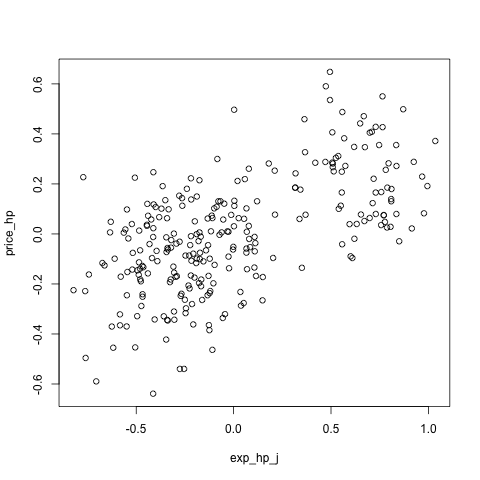

Residual Standard Error=0.3363
R-Square=0.4036
F-statistic (df=1, 266)=180.01
p-value=0

          Estimate Std.Err t-value Pr(>|t|)
Intercept   0.0000  0.0205  0.0000        1
X           1.2014  0.0895 13.4168        0




Residual Standard Error=0.1782
R-Square=0.7744
F-statistic (df=2, 265)=454.7432
p-value=0

          Estimate Std.Err  t-value Pr(>|t|)
Intercept   9.6612  0.0347 278.0954        0
Hp          0.0030  0.0001  21.5984        0
exp_brand   0.3360  0.0251  13.3915        0




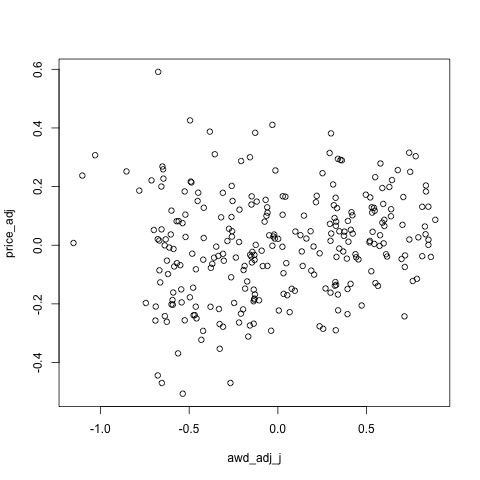

Residual Standard Error=0.1752
R-Square=0.7827
F-statistic (df=3, 264)=316.9108
p-value=0

          Estimate Std.Err  t-value Pr(>|t|)
Intercept   9.6306  0.0355 271.3510   0.0000
Hp          0.0030  0.0001  21.9176   0.0000
exp_brand   0.3013  0.0270  11.1694   0.0000
awd         0.0756  0.0238   3.1750   0.0017




Residual Standard Error=0.4697
R-Square=0.0286
F-statistic (df=1, 266)=7.8235
p-value=0.0055

          Estimate Std.Err t-value Pr(>|t|)
Intercept   0.0000  0.0287   0.000   1.0000
X           0.4529  0.1619   2.797   0.0055




In [107]:
%R 
%R 
%R hp = df_new["Hp"]
%R logprice = y
%R 
%R exp_brand_j<-exp_brand+runif(268,min=-0.3,max=0.3)
%R price_hp = lsfit(hp,logprice)$residuals
%R exp_hp_j = lsfit(hp,exp_brand_j)$residuals
%R plot(exp_hp_j,price_hp)
%R ls.print(lsfit(price_hp,exp_hp))
%R ls.print(lsfit(cbind(hp,exp_brand),logprice))
%R price_adj = lsfit(cbind(hp,exp_brand),logprice)$residuals
%R awd_adj_j = lsfit(cbind(hp,exp_brand),awd_j)$residuals
%R plot(awd_adj_j,price_adj)
%R ls.print(lsfit(cbind(hp,exp_brand,awd),logprice))
%R ls.print(lsfit(price_adj,awd_adj_j))
%R 

In [ ]:

X2 = ev_2.values
ev_3 = df_new.loc[:, ["Hp","Luxuary","model_ja","rear"]]
X3 = ev_3.values1

In [44]:
df_new

,Model,Price_as_tested,4spd,6over,cvt,Disp,Hp,AWD,4WD_dummy,rear,SUV,Pickup,Minivan,Sports,Luxuary,Curb Weight(lb),length(inch),MPG_ovarall,Reliability,Electric,Hybrid,Hybrid(option),model_ja
0,Acura ILX Premium,31600.0,0,1,0,2.4,201,0,0,0,0,0,0,0,1,3100,182,28,1,0,0,0,1
1,Acura MDX Tech,51425.0,0,1,0,3.5,290,1,0,0,1,0,0,0,1,4200,196,21,2,0,0,1,1
2,Acura RDX,40100.0,0,1,0,3.5,279,1,0,0,1,0,0,0,1,3850,184,22,4,0,0,0,1
3,Acura RLX Tech,58400.0,0,1,0,3.5,310,1,0,0,0,0,0,0,1,3930,198,23,2,0,0,1,1
4,Acura TLX 2.4L,39375.0,0,1,0,2.4,206,0,0,0,0,0,0,0,1,3480,190,27,2,0,0,0,1
5,Acura TLX SH-AWD,39375.0,0,1,0,3.5,290,1,0,0,0,0,0,0,1,3750,190,25,2,0,0,0,1
6,Alfa Romeo 4C,60900.0,0,1,0,1.7,237,0,0,1,0,0,0,1,0,2470,157,28,1,0,0,0,1
7,Alfa Romeo Giulia,55947.5,0,1,0,2.0,280,1,0,1,0,0,0,0,0,3700,183,27,1,0,0,0,1
8,Alfa Romeo Stelvio,42995.0,0,1,0,2.0,280,1,0,0,1,0,0,0,0,4020,185,24,1,0,0,0,1
9,Audi A3 Premium,37800.0,0,1,0,1.4,204,1,0,0,0,0,0,0,1,3140,175,27,3,0,0,0,1


In [60]:
hybrid = df_new["Hybrid(option)"]
%R -i hybrid

In [63]:
%R 
%R 
%R 
%R suv = df_new["SUV"]
%R 
%R 
%R 
%R 
%R 
%R 
%R
%R 
%R 
%R ls.print(lsfit(cbind(hp,luxu,hybrid,suv),logprice))
%R 
%R 

Residual Standard Error=0.1939
R-Square=0.7348
F-statistic (df=4, 263)=182.13
p-value=0

          Estimate Std.Err  t-value Pr(>|t|)
Intercept   9.6284  0.0386 249.7556   0.0000
Hp          0.0031  0.0002  20.5967   0.0000
Luxuary     0.2303  0.0284   8.1001   0.0000
hybrid      0.1455  0.0474   3.0728   0.0023
SUV         0.0639  0.0249   2.5683   0.0108




In [79]:
df_new.loc[[168],["Model"]] = "Lincoln"

In [69]:
six_over = df_new["6over"]

%R -i six_over

In [80]:
#　高級車が１、それ以外は０
#4.4316万ドル以上を高級車とする（日本円で５００万以上）
def exp_brand(x):
    if 'Cadillac' in x:
        r = 1
    elif "Genesis" in x:
        r = 1
    elif "Alfa" in x:
        r = 1
    elif "BMW" in x:
        r = 1
    elif "Infiniti" in x:
        r = 1
    elif "Jaguar" in x:
        r = 1
    elif "Genesis" in x:
        r = 1
    elif "Land" in x:
        r = 1
    elif "Lincoin" in x:
        r = 1
    elif "Maserati" in x:
        r = 1
    elif "Mercedes-Benz" in x:
        r = 1
    elif "Porsche" in x:
        r = 1
    elif "Volvo" in x:
        r = 1
    elif "Audi" in x:
        r = 1
    elif "Lexus" in x:
        r = 1
    elif "Lincoln" in x:
        r = 1
    else:
        r = 0
    return r

In [81]:
df_new['exp_brand'] = df_new['Model'].apply(exp_brand)
exp_brand = df_new["exp_brand"]
%R -i exp_brand

# Rプロット

In [153]:
%R 
%R 
%R 
%R rear = df_new["rear"]
%R 
%R 
%R 
%R 
%R 
%R 
%R
%R 
%R 
%R ls.print(lsfit(cbind(hp,luxu,awd),logprice))
%R 
%R 

Residual Standard Error=0.1931
R-Square=0.736
F-statistic (df=3, 264)=245.3936
p-value=0

          Estimate Std.Err  t-value Pr(>|t|)
Intercept   9.6060  0.0390 246.3482        0
Hp          0.0031  0.0002  20.6928        0
Luxuary     0.2182  0.0291   7.4894        0
awd         0.1076  0.0261   4.1288        0




In [736]:
%R awd = awd+runif(268, min=0.3, max=0.3)

array([0.9, 1.9, 1.9, 1.9, 0.9, 1.9, 0.9, 1.9, 1.9, 1.9, 1.9, 1.9, 1.9,
       1.9, 1.9, 1.9, 1.9, 1.9, 1.9, 1.9, 1.9, 1.9, 1.9, 1.9, 1.9, 1.9,
       1.9, 0.9, 1.9, 1.9, 1.9, 1.9, 1.9, 1.9, 1.9, 1.9, 1.9, 1.9, 1.9,
       0.9, 0.9, 0.9, 0.9, 0.9, 1.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9,
       0.9, 0.9, 0.9, 1.9, 1.9, 1.9, 1.9, 0.9, 1.9, 1.9, 1.9, 1.9, 0.9,
       1.9, 0.9, 0.9, 0.9, 1.9, 0.9, 1.9, 1.9, 1.9, 1.9, 1.9, 0.9, 0.9,
       0.9, 0.9, 0.9, 1.9, 0.9, 0.9, 1.9, 1.9, 1.9, 0.9, 0.9, 1.9, 0.9,
       1.9, 0.9, 0.9, 0.9, 0.9, 1.9, 0.9, 1.9, 1.9, 1.9, 0.9, 0.9, 0.9,
       0.9, 1.9, 1.9, 0.9, 1.9, 0.9, 1.9, 1.9, 0.9, 0.9, 0.9, 1.9, 1.9,
       0.9, 0.9, 1.9, 1.9, 1.9, 1.9, 1.9, 1.9, 1.9, 1.9, 1.9, 0.9, 1.9,
       1.9, 1.9, 1.9, 1.9, 1.9, 1.9, 0.9, 0.9, 1.9, 0.9, 0.9, 0.9, 0.9,
       1.9, 0.9, 0.9, 0.9, 0.9, 1.9, 0.9, 1.9, 1.9, 0.9, 1.9, 1.9, 1.9,
       0.9, 0.9, 1.9, 0.9, 1.9, 1.9, 1.9, 1.9, 1.9, 1.9, 1.9, 1.9, 1.9,
       1.9, 1.9, 1.9, 1.9, 1.9, 1.9, 1.9, 1.9, 1.9, 1.9, 0.9, 0.

In [24]:
%R awd_jittered<-awd+runif(268,min=-0.3,max=0.3)

array([ 0.04525212,  1.11952755,  1.11584118,  0.78713353, -0.15309971,
        0.71243517,  0.40641688,  0.8771001 ,  1.09833712,  1.47604523,
        0.62482695,  1.04354752,  1.21447621,  1.22965534,  0.47344202,
        1.16387349,  1.52731971,  1.12581861,  0.90609714,  0.92959965,
        0.8544549 ,  1.23851092,  1.27936251,  1.03553028,  0.72730338,
        0.79245018,  1.14377212,  0.01248494,  1.0342642 ,  0.77928308,
        1.30135102,  0.72340541,  1.00607406,  0.69003823,  0.49110818,
        0.78730427,  1.0982229 ,  1.48371153,  1.37180523,  0.00760675,
        0.16249846,  0.37908007,  0.11692721,  0.2100105 ,  0.78481094,
        0.47223101,  0.19727875, -0.12817812,  0.23871776, -0.07716451,
       -0.18479859, -0.35562698,  0.35293818,  0.20608096,  0.20969402,
        1.12719018,  1.12640085,  1.0720442 ,  1.26300734, -0.30041134,
        0.63611953,  0.55783307,  0.84823689,  1.08249381,  0.33214289,
        0.76169042, -0.30232968, -0.09193097,  0.12696992,  1.42

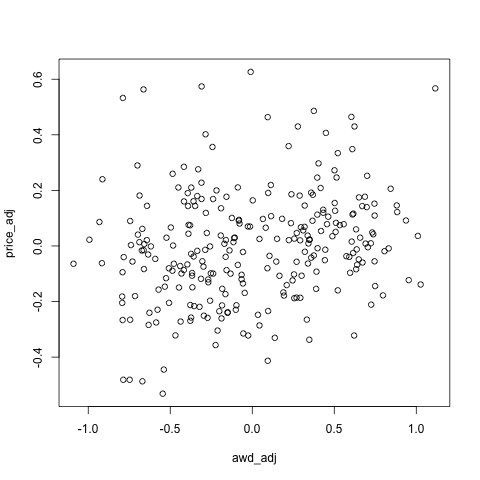

Residual Standard Error=0.1931
R-Square=0.736
F-statistic (df=3, 264)=245.3936
p-value=0

          Estimate Std.Err  t-value Pr(>|t|)
Intercept   9.6060  0.0390 246.3482        0
Hp          0.0031  0.0002  20.6928        0
Luxuary     0.2182  0.0291   7.4894        0
AWD         0.1076  0.0261   4.1288        0




Residual Standard Error=0.1989
R-Square=0.719
F-statistic (df=2, 265)=339.0368
p-value=0

          Estimate Std.Err  t-value Pr(>|t|)
Intercept   9.6485  0.0387 249.1063        0
Hp          0.0031  0.0002  20.1870        0
Luxuary     0.2649  0.0277   9.5804        0




Residual Standard Error=0.1931
R-Square=0.736
F-statistic (df=3, 264)=245.3936
p-value=0

          Estimate Std.Err  t-value Pr(>|t|)
Intercept   9.6060  0.0390 246.3482        0
Hp          0.0031  0.0002  20.6928        0
Luxuary     0.2182  0.0291   7.4894        0
AWD         0.1076  0.0261   4.1288        0




In [42]:
%R 
%R 
%R luxu = df_new["Luxuary"]
%R 
%R logprice = y
%R 
%R price_adj = lsfit(cbind(hp,luxu),logprice)$residuals
%R awd_adj = lsfit(cbind(hp,luxu),awd_jittered)$residuals
%R 
%R plot(awd_adj,price_adj)
%R 
%R awd = df_new["AWD"]
%R ls.print(lsfit(cbind(hp,luxu,awd),logprice))
%R ls.print(lsfit(cbind(hp,luxu),logprice))
%R ls.print(lsfit(cbind(hp,luxu,awd),logprice))
%R 

In [753]:
%R pick_jittered<-pick+runif(268,min=-0.3,max=0.3)
%R awd_jittered<-awd+runif(268,min=-0.3,max=0.3)
%R suv_jittered<-suv+runif(268,min=-0.3,max=0.3)

array([ 2.25248362e-01, -2.88753770e-02,  8.75245761e-02, -2.91316458e-01,
        2.09872857e-01,  8.44964838e-02,  2.46758952e-01,  1.41961965e-01,
        1.37745490e-01, -1.44905270e-01, -4.89909011e-02,  1.58083181e-01,
       -2.95212473e-01, -2.30507391e-01,  9.09032822e-03, -8.31520817e-02,
       -2.32938108e-01, -1.57124411e-01, -2.13423373e-01, -1.88339379e-01,
       -9.69732789e-02, -2.88373037e-01,  2.57895514e-01,  2.01347390e-01,
        1.69323202e-01, -2.77607053e-01, -1.82505156e-01,  1.10973105e-02,
       -1.08148958e-01,  8.61307437e-02, -2.88459135e-01, -1.11942399e-01,
        5.21917110e-02,  1.38237560e-01,  1.22838170e-01,  1.67473497e-01,
        1.13434431e-01,  9.71582020e-02,  2.06064548e-01,  2.63612493e-01,
        9.06410764e-01,  7.39152577e-01, -3.44266979e-02,  1.07868561e-01,
        2.59698282e-02, -1.32702718e-01,  1.89044349e-01,  2.27040566e-01,
        1.16048938e-01,  9.44876772e-01,  1.08567035e+00, -1.35236055e-01,
        1.79170783e-01,  

In [627]:
%R -o awd_jittered
%R -o suv_jittered
%R -o pick_jittered

In [628]:
full_model["AWD"] = awd_j
full_model["SUV"] = suv_j
full_model["Luxuary"] = luxu_j
full_model["Hybrid(option)"] = hybrid_j
full_model["exp_brand"] = exp_brand_j

In [164]:
drop_last = ["Disp","length(inch)","Model","4spd","6over","cvt","4WD_dummy","Pickup","Minivan","Sports","MPG_ovarall","Reliability","Electric","Hybrid","model_ja"]

In [165]:
df_new = df_new.drop(drop_last,axis=1)


In [168]:
full_model = df_new.drop("rear",axis=1)

In [169]:
full_model

,Price_as_tested,Hp,AWD,SUV,Luxuary,Curb Weight(lb),Hybrid(option),exp_brand
0,31600.0,201,0,0,1,3100,0,0
1,51425.0,290,1,1,1,4200,1,0
2,40100.0,279,1,1,1,3850,0,0
3,58400.0,310,1,0,1,3930,1,0
4,39375.0,206,0,0,1,3480,0,0
5,39375.0,290,1,0,1,3750,0,0
6,60900.0,237,0,0,0,2470,0,1
7,55947.5,280,1,0,0,3700,0,1
8,42995.0,280,1,1,0,4020,0,1
9,37800.0,204,1,0,1,3140,0,1


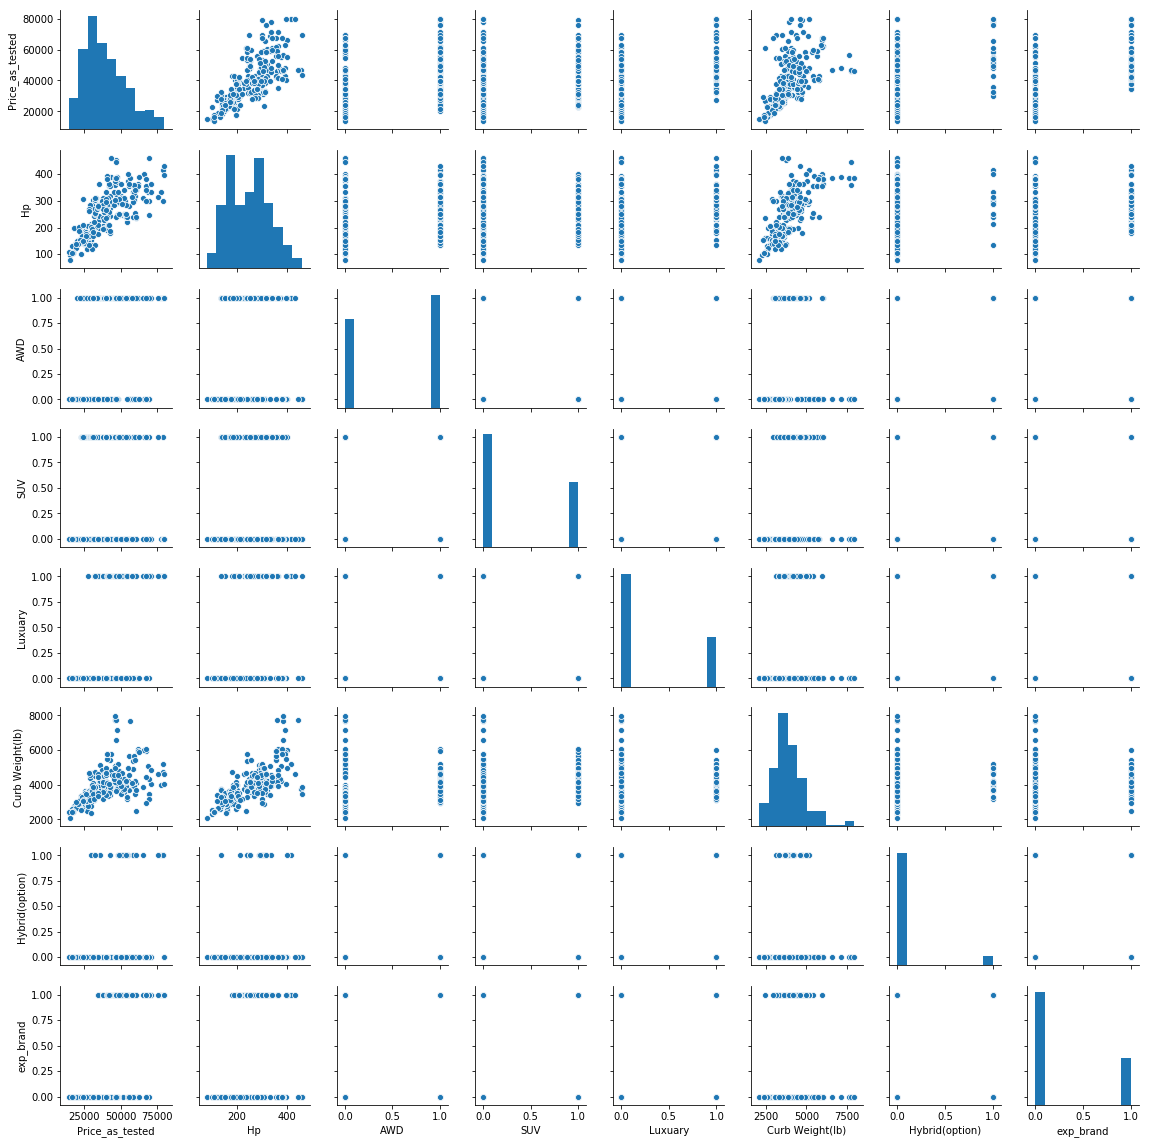

In [170]:
# 散布図行列を出力
# locメソッドで一部の特徴量だけをピックアップ
import seaborn as sns
sns.pairplot(full_model, size=2.0)
plt.show()

In [142]:
hp = df_new.loc[:, ["Hp"]].values
length = df_new.loc[:, ["length(inch)"]].values
weight = df_new.loc[:, ["Curb Weight(lb)"]].values
mpg = df_new.loc[:, ["MPG_ovarall"]].values
disp = df_new.loc[:, ["Disp"]].values

In [194]:
luxuary = df_new["Luxuary"].values

In [360]:
full_model.to_csv("full_model.csv")

In [105]:
lr.fit(disp,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [106]:
disp.shape

(270, 1)

In [107]:
y_pred = lr.predict(disp)
price_adj = y_pred - y

In [108]:
lr.fit(disp,awd)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [113]:
type(awd_disp)

pandas.core.series.Series

In [109]:
disp_pre = lr.predict(disp)
awd_disp = disp_pre - awd

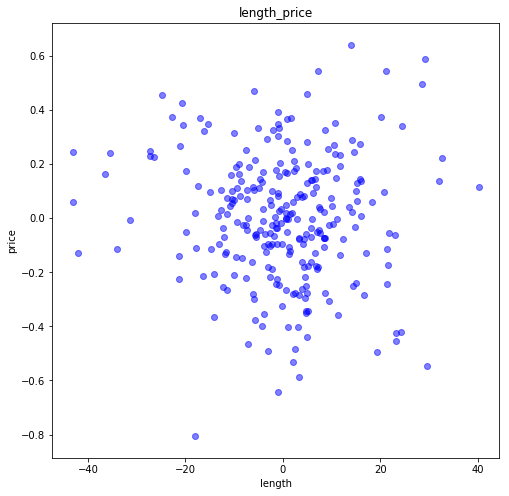

In [26]:
plt.figure(figsize=(8, 8))
plt.scatter(len_adj, price_adj, color='blue', marker='o', label='train', alpha=0.5)
plt.title('length_price')     # グラフのタイトルを表示
plt.xlabel('length')               # x軸のラベルを表示
plt.ylabel('price')                  # y軸のラベルを表示
plt.show() 

In [27]:
hp_l = pd.concat([df_new["Hp"], df_new["length(inch)"]],axis=1)

In [28]:
hp_len = hp_l.values

In [29]:
lr.fit(hp_len,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [30]:
model = smf.OLS(y,hp_len)
result = model.fit()
result.summary()

NameError: name 'smf' is not defined

In [ ]:
y_pred2 = lr.predict(hp_len)
price_adj2 = y_pred2 - y

In [ ]:
lr.fit(hp_len,weight)
weight_pre = lr.predict(hp_len)
weight_adj = weight_pre - weight


In [ ]:
lr.fit(weight_adj,price_adj2)
plt.figure(figsize=(8, 8))
plt.scatter(weight_adj, price_adj2, color='blue', marker='o', label='train', alpha=0.5)
plt.title('weight_price')     # グラフのタイトルを表示
plt.xlabel('weight_hp_len')               # x軸のラベルを表示
plt.ylabel('price')                  # y軸のラベルを表示
plt.show() 

In [ ]:
X = pd.concat([df_new["Hp"], df_new["length(inch)"], df_new["Curb Weight(lb)"]],axis=1)

In [ ]:
hp_len_weight = pd.concat([df_new["Hp"], df_new["length(inch)"], df_new["Curb Weight(lb)"]],axis=1)

In [ ]:
model = smf.OLS(y,hp_len_weight)
result = model.fit()
result.summary()

In [ ]:
# 自由度調整済み決定係数
# (決定係数, trainまたはtestのサンプル数, 利用した特徴量の数)
def adjusted(score, n_sample, n_features):
    adjusted_score = 1 - (1 - score) * ((n_sample - 1) / (n_sample - n_features - 1))
    return adjusted_score

In [ ]:
print('R^2')
print('train: %.3f' % lr.score(X, y))
print('train: %3f' % adjusted(lr.score(X, y), len(y), 2))

In [ ]:
current_va = pd.concat([df_new["Hp"], df_new["length(inch)"],df_new["Curb Weight(lb)"]],axis=1).values

In [ ]:
lr.fit(current_va,y)

In [ ]:
y_pred3 = lr.predict(current_va)
price_adj3 = y_pred3 - y

In [ ]:
model = lr.fit(current_va,disp)
disp_pre = lr.predict(current_va)
disp_adj = disp_pre - disp

In [ ]:
lr.fit(weight_adj,price_adj2)
plt.figure(figsize=(8, 8))
plt.scatter(disp_adj, price_adj3, color='blue', marker='o', label='train', alpha=0.5)
plt.title('disp_price')     # グラフのタイトルを表示
plt.xlabel('disp_hp_len_weight')               # x軸のラベルを表示
plt.ylabel('price')                  # y軸のラベルを表示
plt.show() 

In [ ]:
X = pd.concat([df_new.loc[:,["Hp"]], df_new.loc[:,["length(inch)"]],df_new.loc[:,["Disp"]]],axis=1).values
               
               
               
               
               
               

In [ ]:
lr.fit(X,y)


In [ ]:
print('R^2')
print('train: %.3f' % lr.score(X, y))
print('train: %3f' % adjusted(lr.score(X, y), len(y), 2))

In [ ]:
import statsmodels.formula.api as smf

In [ ]:
lr.coef_

In [ ]:
lr.intercept_
print(lr.predict(X))

In [ ]:
result = lr.predict(X)
result.shape

In [ ]:
X.shape

In [ ]:
print(y.size)
print(x.size)
x = np.arange(0, 270, 1)[:, np.newaxis]    

In [ ]:
y = lr.predict(X)
y = y.reshape(-1,1)
print(y.shape)
print(x.shape)
print()

In [ ]:
plt.scatter(x,y)

In [ ]:
print(x.size)
print(y.size)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
quad = PolynomialFeatures(degree=2)  
qr = quad.fit_transform(X)

In [ ]:
# 線形回帰のインスタンスを生成
model_quad = LinearRegression()
# 変換後の変数を利用して実行
model_quad.fit(qr, y)

In [ ]:
model_lin = LinearRegression()
model_lin.fit(hp, y)

In [ ]:
# 散布図に近似直線を重ねてみる
plt.scatter(hp, y, color='lightgray', label='data')         # 散布図を表示
x = np.arange(0, 450, 1)[:, np.newaxis]                         # プロットのためのxを用意
plt.plot(x, model_lin.predict(x), color='red', label='linear') # 回帰直線を表示
plt.xlabel('hp')                                            # x軸のラベルを表示
plt.ylabel('price')                                             # y軸のラベルを表示
plt.legend(loc = 'upper left')                                # 凡例を表示
plt.show()                                                     # 上記の内容でグラフを表示

In [ ]:
print('model_linear')
print(model_lin.score(hp, y))

In [ ]:
# 2次関数の変数変換
from sklearn.preprocessing import PolynomialFeatures
quad = PolynomialFeatures(degree=3)    # 2次の多項式基底を生成
hp_quad = quad.fit_transform(hp) # 生成した基底関数で変数変換を実行
hp_quad

In [ ]:
model_quad.fit(hp_quad, y)

In [ ]:
# 散布図に近似直線､近似曲線を重ねてみる
plt.scatter(hp, y, color='lightgray', label='data')               # 散布図を表示
plt.plot(x, model_lin.predict(x), color='red', label='linear')       # 回帰直線を表示
x_quad = quad.fit_transform(x)                                       # プロットのためのxも2変数変換する
plt.plot(x, model_quad.predict(x_quad), color='green', label='quad') # 回帰曲線を表示（2次関数）
plt.xlabel('hp')                                                  # x軸のラベルを表示
plt.ylabel('y')                                                   # y軸のラベルを表示
plt.legend(loc = 'upper right')                                      # 凡例を表示
plt.show()                                                           # 上記の内容でグラフを表示

In [ ]:
y.size

In [ ]:
X = np.hstack((hp_cub,length,mpg,weight))

In [ ]:
# 2次関数の変数変換
from sklearn.preprocessing import PolynomialFeatures
cubic = PolynomialFeatures(degree=3)    # 3次の多項式基底を生成
hp_cub = cubic.fit_transform(hp) # 生成した基底関数で変数変換を実行
hp_cub

In [ ]:
# 線形回帰のインスタンスを生成
model_cubic = LinearRegression()

In [ ]:
model_cubic.fit(X,y)

In [ ]:
model_cubic.score(X,y)

In [ ]:
model = smf.OLS(y,hp)
result = model.fit()
result.summary()

In [158]:
df_new

,Model,Price_as_tested,4spd,6over,cvt,Hp,AWD,4WD_dummy,rear,SUV,Pickup,Minivan,Sports,Luxuary,Curb Weight(lb),MPG_ovarall,Reliability,Electric,Hybrid,Hybrid(option),model_ja,exp_brand
0,Acura ILX Premium,31600.0,0,1,0,201,0,0,0,0,0,0,0,1,3100,28,1,0,0,0,1,0
1,Acura MDX Tech,51425.0,0,1,0,290,1,0,0,1,0,0,0,1,4200,21,2,0,0,1,1,0
2,Acura RDX,40100.0,0,1,0,279,1,0,0,1,0,0,0,1,3850,22,4,0,0,0,1,0
3,Acura RLX Tech,58400.0,0,1,0,310,1,0,0,0,0,0,0,1,3930,23,2,0,0,1,1,0
4,Acura TLX 2.4L,39375.0,0,1,0,206,0,0,0,0,0,0,0,1,3480,27,2,0,0,0,1,0
5,Acura TLX SH-AWD,39375.0,0,1,0,290,1,0,0,0,0,0,0,1,3750,25,2,0,0,0,1,0
6,Alfa Romeo 4C,60900.0,0,1,0,237,0,0,1,0,0,0,1,0,2470,28,1,0,0,0,1,1
7,Alfa Romeo Giulia,55947.5,0,1,0,280,1,0,1,0,0,0,0,0,3700,27,1,0,0,0,1,1
8,Alfa Romeo Stelvio,42995.0,0,1,0,280,1,0,0,1,0,0,0,0,4020,24,1,0,0,0,1,1
9,Audi A3 Premium,37800.0,0,1,0,204,1,0,0,0,0,0,0,1,3140,27,3,0,0,0,1,1


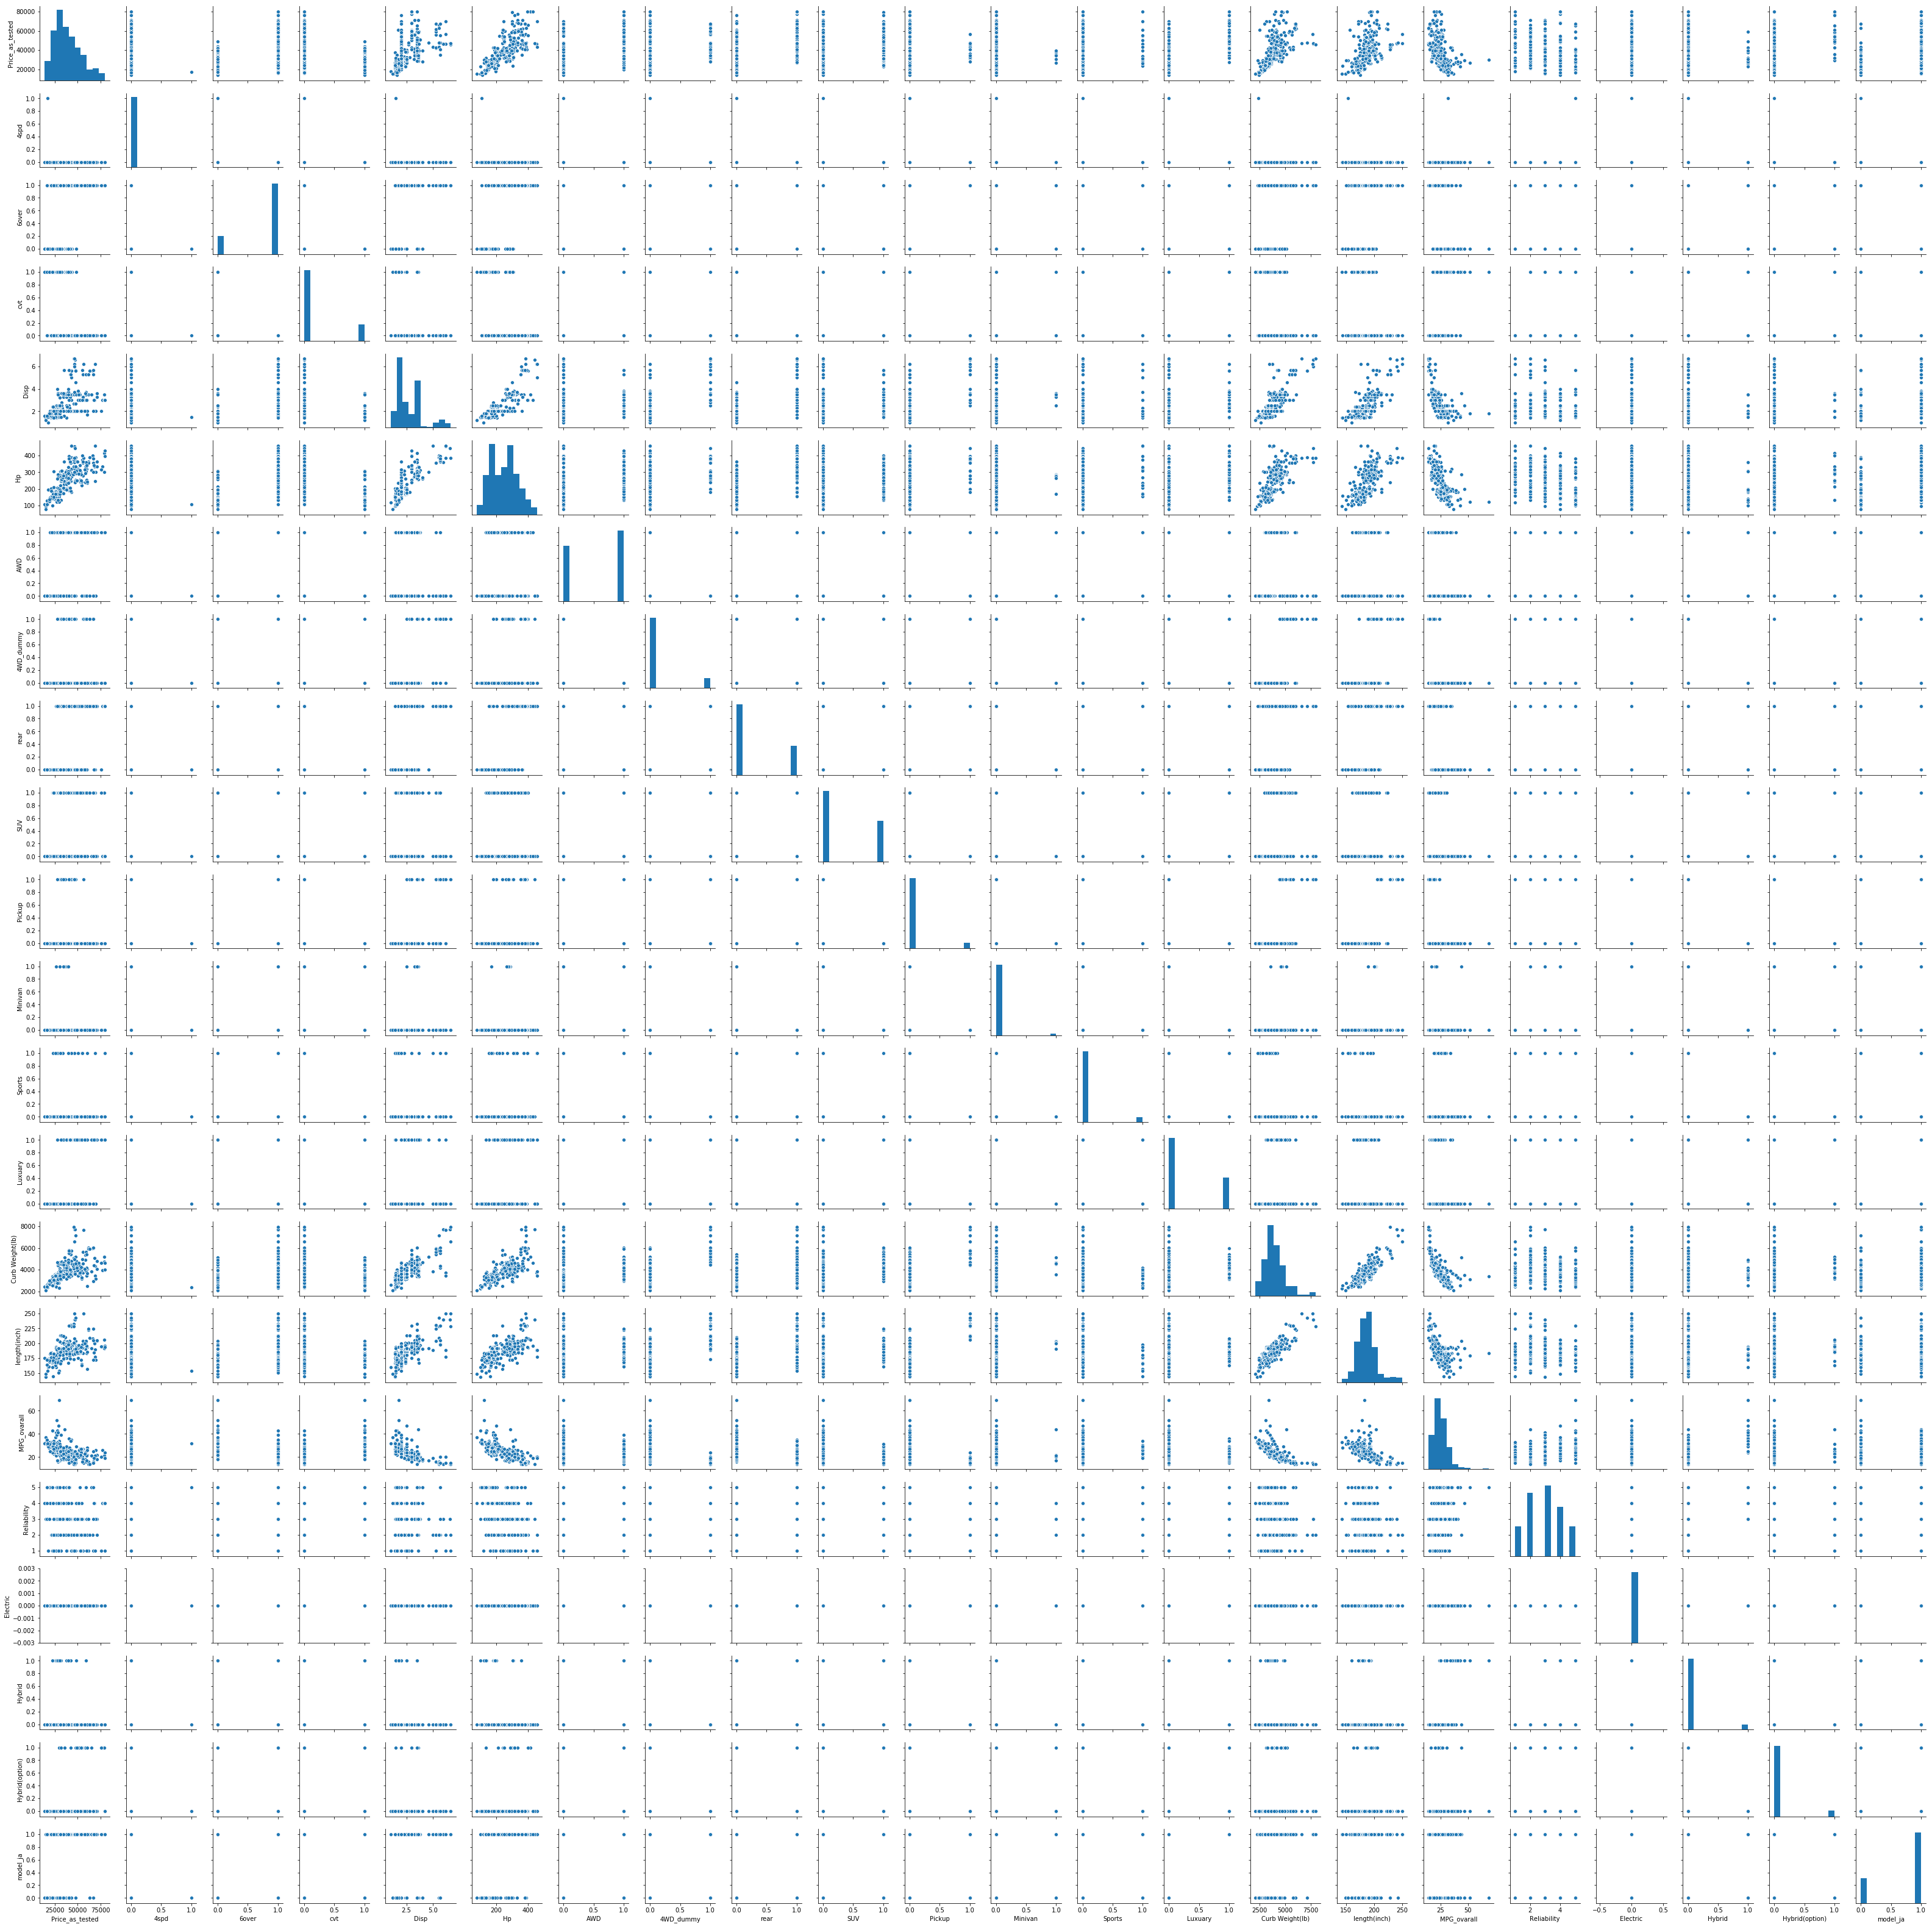

In [299]:
# 散布図行列を出力
# locメソッドで一部の特徴量だけをピックアップ
import seaborn as sns
sns.pairplot(df, size=2.0)
plt.show()